# HOUSING PRICE PREDICTON

## Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: 
* Which variables are important to predict the price of variable? 
* How do these variables describe the price of the house?

## Bussiness Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

## Technical Requirements:

Data contains 1460 entries each having 81 variables.
* Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains numerical as well as categorical variable. You need to handle them accordingly.
* You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. 
* You need to find important features which affect the price positively or negatively.
* Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df_housing=pd.read_csv("house_train.csv")
df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
df_htest=pd.read_csv("house_test.csv")
df_htest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


Obs- Here in the test data,"sale price" column is missing and has to be predicted by our model

In [4]:
df_housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The decription to these columns is added in the folder enclosed

## Starting the EDA

In [5]:
df_housing.shape

(1168, 81)

In [6]:
#Checking for data types of all columns
pd.set_option("display.max_rows",None)
df_housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Obs- We can see dataset contains both continuous and categorical columns, so we would be doing seperate visualization for both types and later do encoding of cintinuous columns

In [7]:
#Checking for null values
df_housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Obs- There are many null values in multiple columns, so we will either perform imputation(on columns with few nan entries) or delete (columns with huge nan entries)

In [8]:
#Checking the number of unique values in all columns
df_housing.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [9]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Obs- Through the mean and 50% values , we can see data in all columns is either right or left skewed

Also as max is quite large than 75% in most columns, we can say outliers are present too.

## Data Cleaning and Pre-Processing

### Deleting the 1)high missing-data columns,2) unwanted columns and 3)filling null values column

#### 1) High missing-data columns

* We have seen missing values is very high in columns: "Alley:1091", "FireplaceQu:551", "PoolQC:1161","Fence:931","MiscFeature:1124" And therefore filling it with using imputer will not be efficient and thus we should be dropping these columns

* Also we have noticed in the desription, "Alley and Street" have similar data, so there will not be any loss, The other features also are not very important features so we cna drop them too    

In [10]:
drop_columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
df_housing.drop(drop_columns,axis = 1,inplace = True)

In [11]:
df_housing.shape

(1168, 76)

In [12]:
# Performing the same step for test data

In [13]:
df_htest.drop(drop_columns,axis = 1,inplace = True)
df_htest.shape

(292, 75)

#### 2) Unwanted Columns
Id is not important for price detection so deleting that column

In [14]:
df_housing.drop(columns=['Id'],axis=1,inplace=True)
df_housing.shape

(1168, 75)

In [15]:
df_htest.drop(columns=['Id'],axis = 1,inplace = True)
df_htest.shape

(292, 74)

#### 3)Filling Null Values

The columns that have acceptable null values are of two types: 
* a)object: will be filling those columns with mode value

  "MasVnrType-7", "BsmtQual-30", "BsmtCond-30", "BsmtExposure-31", "BsmtFinType1-30", "BsmtFinType2-31","GarageType- 64","GarageFinish-64","GarageQual-64","GarageCond-64"
    
    
* b)float: will be filling those columns with mean value

  "MasVnrArea-7", "GarageYrBlt-64"

In [16]:
# a)object type
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )
si = si.fit(df_housing[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']])
df_housing[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']] = si.transform(df_housing[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']])

In [17]:
# b)float values
df_housing["LotFrontage"] = df_housing["LotFrontage"].fillna(df_housing["LotFrontage"].mean())
df_housing["MasVnrArea"] = df_housing["MasVnrArea"].fillna(df_housing["MasVnrArea"].mean())
df_housing["GarageYrBlt"] = df_housing["GarageYrBlt"].fillna(df_housing["GarageYrBlt"].mean())

In [18]:
df_housing.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [19]:
# Performing the same for test data

# a)Object Type

from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )
si = si.fit(df_htest[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']])
df_htest[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']] = si.transform(df_htest[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']])

In [20]:
# b)float values
df_htest["LotFrontage"] = df_htest["LotFrontage"].fillna(df_htest["LotFrontage"].mean())
df_htest["MasVnrArea"] = df_htest["MasVnrArea"].fillna(df_htest["MasVnrArea"].mean())
df_htest["GarageYrBlt"] = df_htest["GarageYrBlt"].fillna(df_htest["GarageYrBlt"].mean())

In [21]:
df_htest.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## Data Visualization

### Univariate Analysis

In [22]:
# Count Plots to check the percentage of unique attributes

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

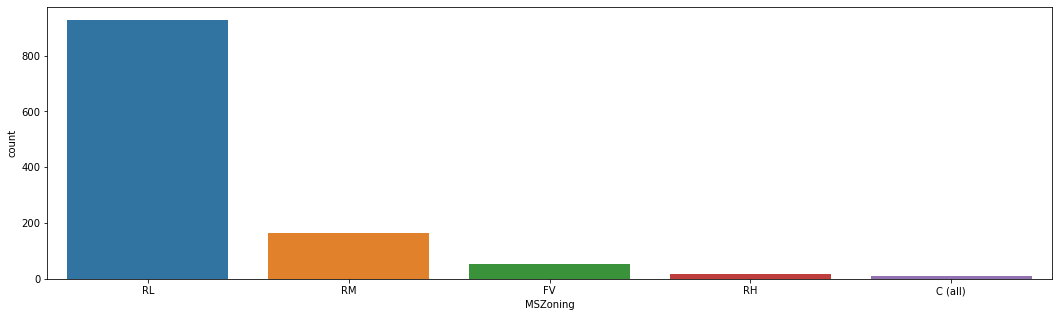

In [23]:
plt.figure(figsize=(18,5))
print(df_housing["MSZoning"].value_counts())
sns.countplot(x="MSZoning", data=df_housing)

Obs- We can see the maximun properties in their list belong to :   "RL: Residential Low Density", followed by "RM:Residential Medium Density","FV:Floating Village Residential","RH
: Residential High Density" and least "C:commercial"

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


<AxesSubplot:xlabel='LotShape', ylabel='count'>

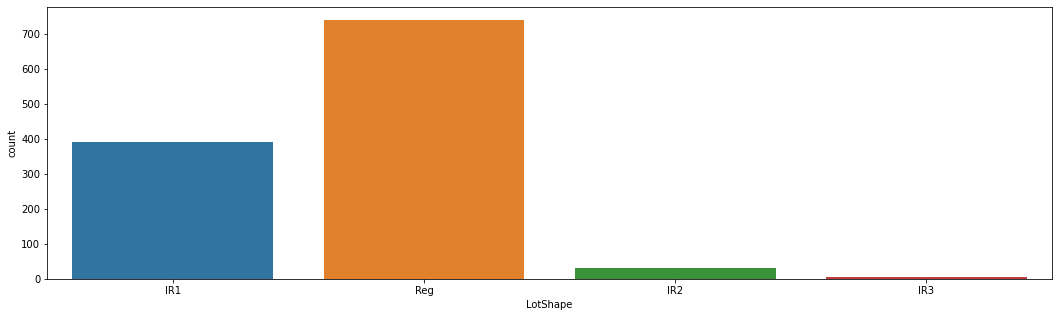

In [24]:
plt.figure(figsize=(18,5))
print(df_housing["LotShape"].value_counts())
sns.countplot(x="LotShape", data=df_housing)

Obs- We can see the maximum properties they have are "Reg:Regular",followed by"IR1:Slightly irregular", very few that are"IR2:Moderately Irregular"
and least that are"IR3:Irregular" That means they can earn good amount since they have good properties

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


<AxesSubplot:xlabel='LotConfig', ylabel='count'>

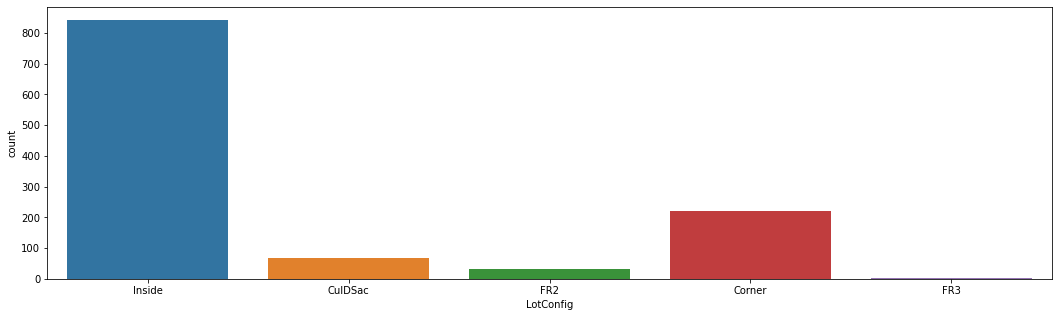

In [25]:
plt.figure(figsize=(18,5))
print(df_housing["LotConfig"].value_counts())
sns.countplot(x="LotConfig", data=df_housing)

Obs- We can see the maximum properties have: "Inside:Inside lot", followed by "Corner:Corner lot", very few "CulDSac:Cul-de-sac"
, a few "FR2:Frontage on 2 sides of property"and least "FR3	Frontage on 3 sides of property"

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


<AxesSubplot:xlabel='BldgType', ylabel='count'>

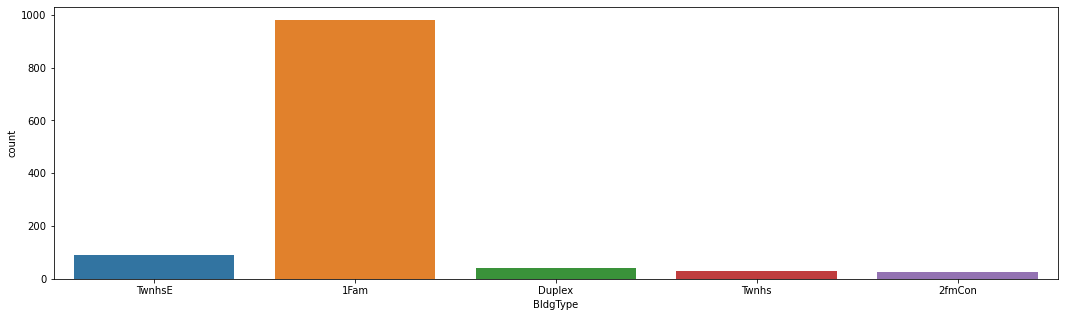

In [26]:
plt.figure(figsize=(18,5))
print(df_housing["BldgType"].value_counts())
sns.countplot(x="BldgType", data=df_housing)

Obs- We can see the maximum properties they own are: "1Fam:Single-family Detached", followed by "TwnhsE	Townhouse End Unit" and few others like
"Duplx:Duplex", "TwnhsI:Townhouse Inside Unit" and "2FmCon:Two-family Conversion; originally built as one-family dwelling"

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

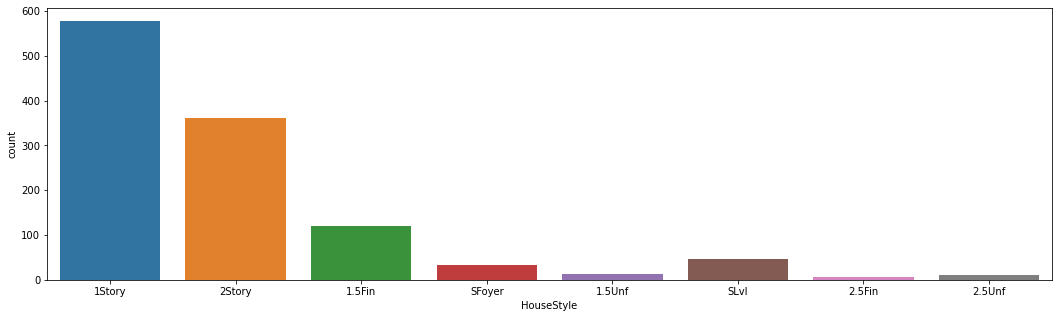

In [27]:
plt.figure(figsize=(18,5))
print(df_housing["HouseStyle"].value_counts())
sns.countplot(x="HouseStyle", data=df_housing)

Obs- We can see they own maximum properties with,"1Story:One story", followed by " 2Story:Two story", then "1.5Fin:One and one-half story: 2nd level finished","SLvl: Split Level"
and few others like,"SFoyer:Split Foyer", "Unf:One and one-half story: 2nd level unfinished", "2.5Fin:Two and one-half story: 2nd level finished","2.5Unf	Two and one-half story: 2nd level unfinished

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


<AxesSubplot:xlabel='OverallQual', ylabel='count'>

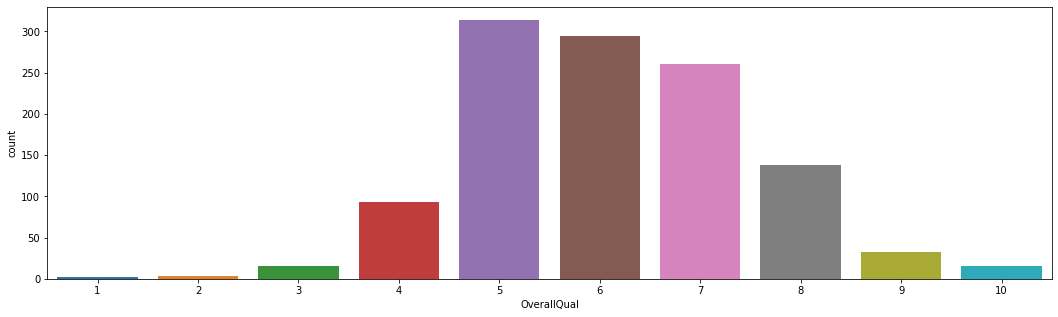

In [28]:
plt.figure(figsize=(18,5))
print(df_housing["OverallQual"].value_counts())
sns.countplot(x="OverallQual", data=df_housing)

obs:We can see the maximum properties thew owe have the quality of materials used: "5:Average","6:Above Average","7:Good", followed by "8:Very Good", "4:Below Average", "9:Excellent, "3:Fair","10:Very Excellent" and a very few,"2:Poor"and "1:Very Poor"

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


<AxesSubplot:xlabel='OverallCond', ylabel='count'>

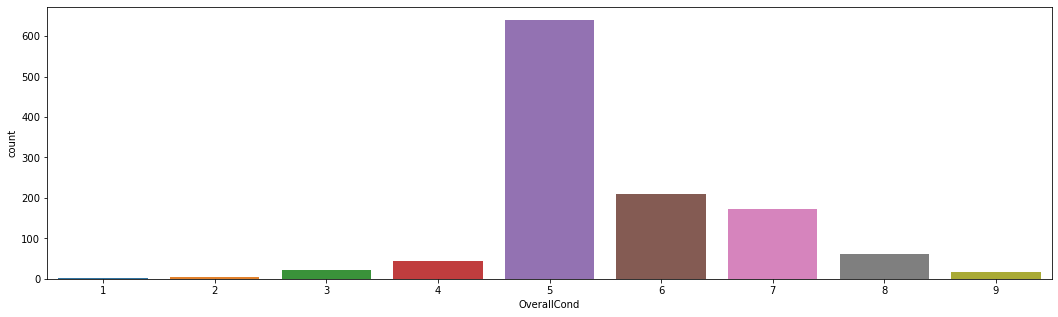

In [29]:
plt.figure(figsize=(18,5))
print(df_housing["OverallCond"].value_counts())
sns.countplot(x="OverallCond", data=df_housing)

obs:We can see the maximum properties thew owe have condition: "5:Average","6:Above Average","7:Good", followed by "8:Very Good", "4:Below Average","3:Fair", "9:Excellent and a very few,"2:Poor"and "1:Very Poor" and none in "10: Very Excellent"

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


<AxesSubplot:xlabel='ExterQual', ylabel='count'>

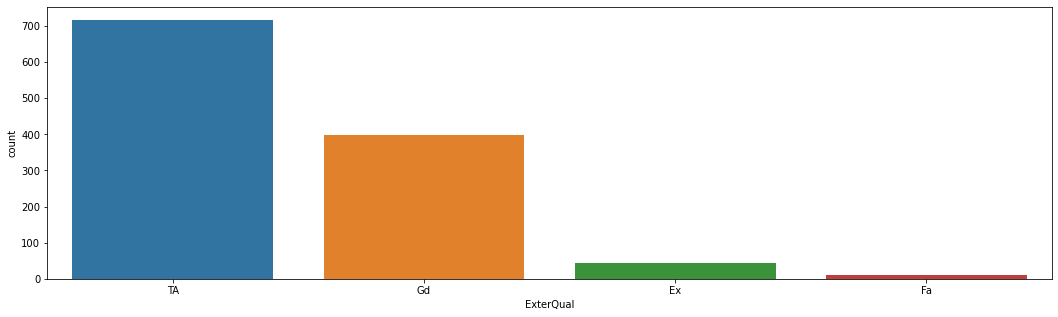

In [30]:
plt.figure(figsize=(18,5))
print(df_housing["ExterQual"].value_counts())
sns.countplot(x="ExterQual", data=df_housing)

obs- We can see the maximum properties they own have exterior quality: "TA:Average/Typical", followed by "Gd:Good", a few "Ex:Excellent" a very few "Fa:Fair" and none "Po:Poor

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


<AxesSubplot:xlabel='ExterCond', ylabel='count'>

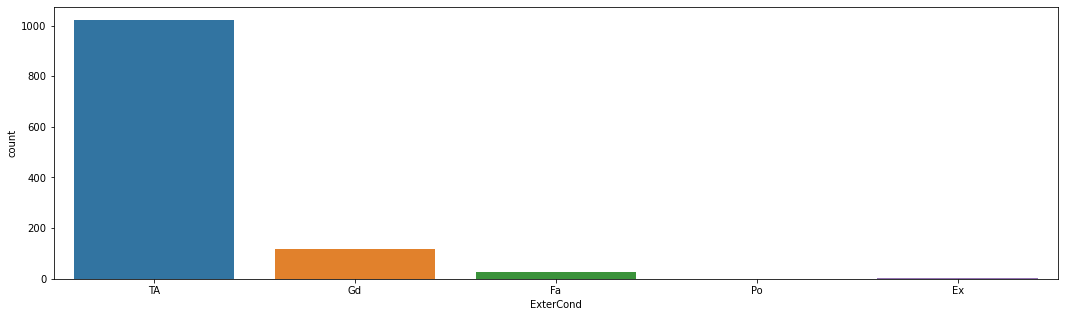

In [31]:
plt.figure(figsize=(18,5))
print(df_housing["ExterCond"].value_counts())
sns.countplot(x="ExterCond", data=df_housing)

obs- We can see the maximum properties they own have exterior condition: "TA:Average/Typical", followed by "Gd:Good" and hardly 1-2 of "Excellent" or "Poor" condition

TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

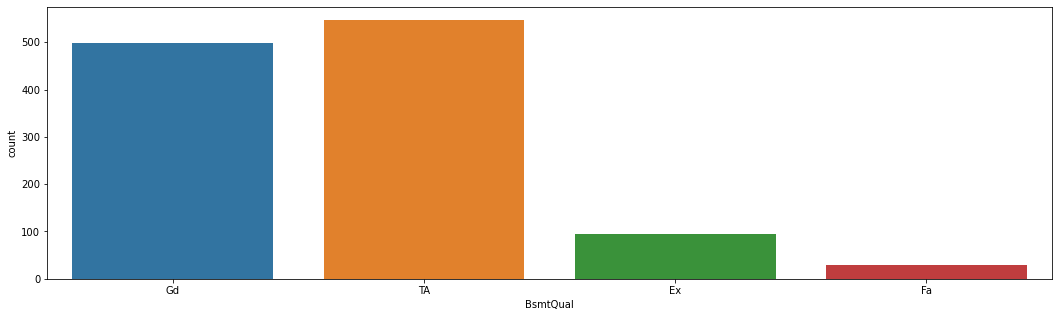

In [32]:
plt.figure(figsize=(18,5))
print(df_housing["BsmtQual"].value_counts())
sns.countplot(x="BsmtQual", data=df_housing)

Obs- We can see the maximum basements they own has height : "TA:Typical (80-89 inches)", followed by, "Gd:Good (90-99 inches)",very few, "Ex	Excellent (100+ inches)" , a few ,"Fa:Fair (70-79 inches)" and none with "Po:Poor (<70 inches)
or "NA:No Basement"

TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

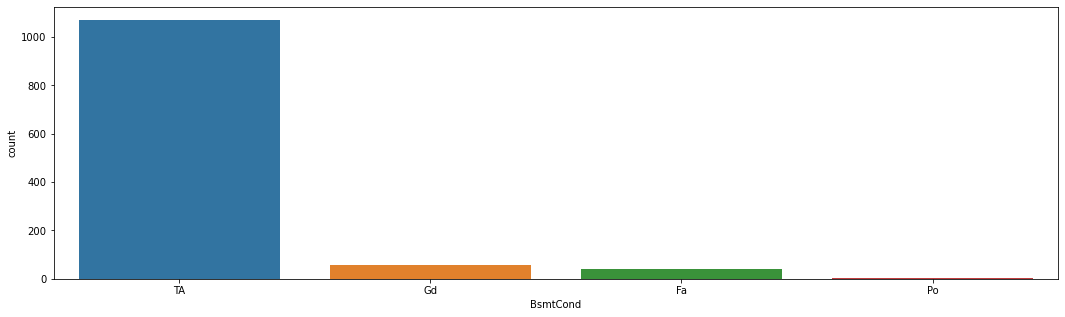

In [33]:
plt.figure(figsize=(18,5))
print(df_housing["BsmtCond"].value_counts())
sns.countplot(x="BsmtCond", data=df_housing)

obs- We can see the maximum basements they own are in condition, "TA:Typical - slight dampness allowed", a very few, "Gd:Good", "Fa	Fair:dampness or some cracking or settling", 1-2 "Po:Poor - Severe cracking, settling, or wetness" and none "Ex	Excellent" or "NA:No Basement"

Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

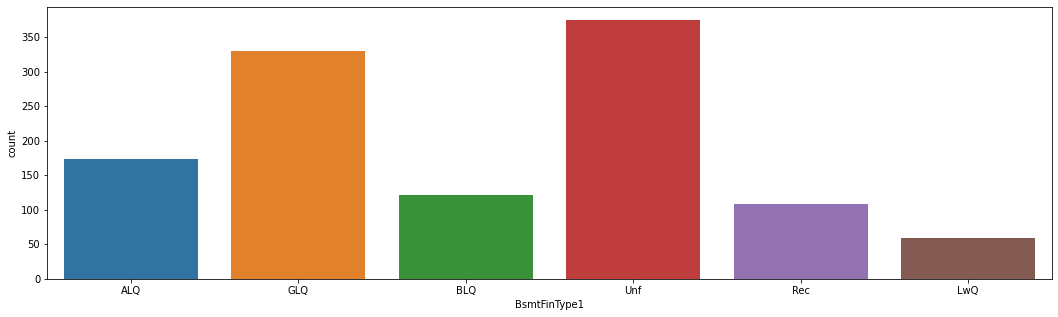

In [34]:
plt.figure(figsize=(18,5))
print(df_housing["BsmtFinType1"].value_counts())
sns.countplot(x="BsmtFinType1", data=df_housing)

Obs- We can see max basements they own are, "Unf:Unfinshed", followed by, "GLQ:Good Living Quarters", "ALQ	Average Living Quarters","BLQ:Below Average Living Quarters","Rec:Average Rec Room" and a few,"LwQ:Low Quality"

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

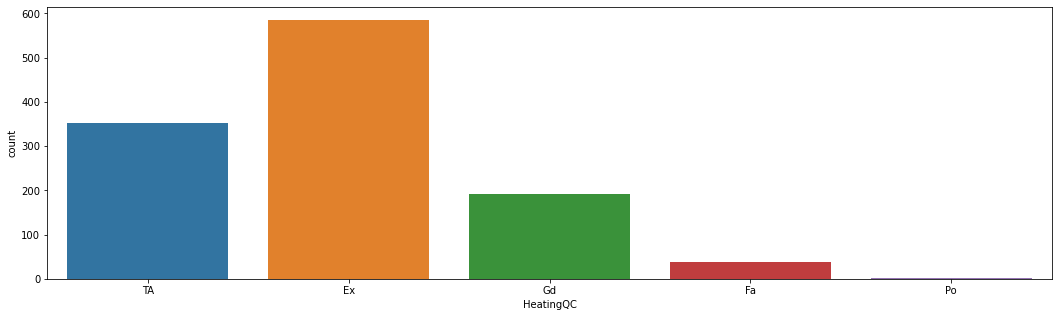

In [35]:
plt.figure(figsize=(18,5))
print(df_housing["HeatingQC"].value_counts())
sns.countplot(x="HeatingQC", data=df_housing)

Obs- We can see maximum basements have heating quality,"Ex:Excellent" , followed by "TA:Average/Typical", then "Gd:Good" and a few, "Fa:Fair"

Y    1090
N      78
Name: CentralAir, dtype: int64


<AxesSubplot:xlabel='CentralAir', ylabel='count'>

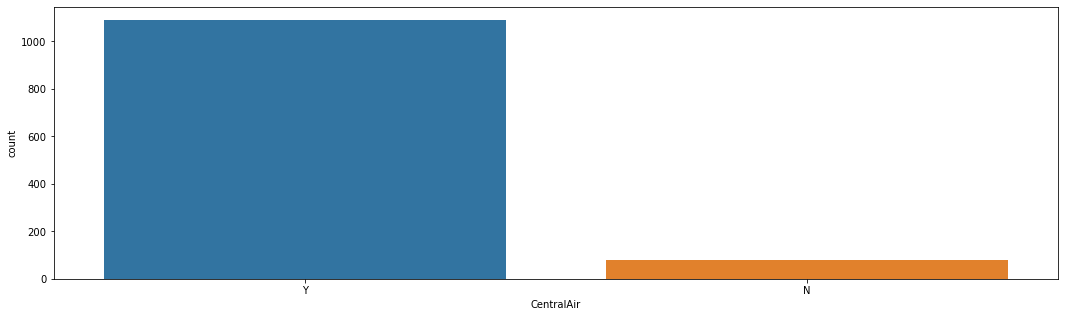

In [36]:
plt.figure(figsize=(18,5))
print(df_housing["CentralAir"].value_counts())
sns.countplot(x="CentralAir", data=df_housing)

Obs- We can see most of the properties have AC configuration,"Y:yes" and a very few who have"N:no"

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

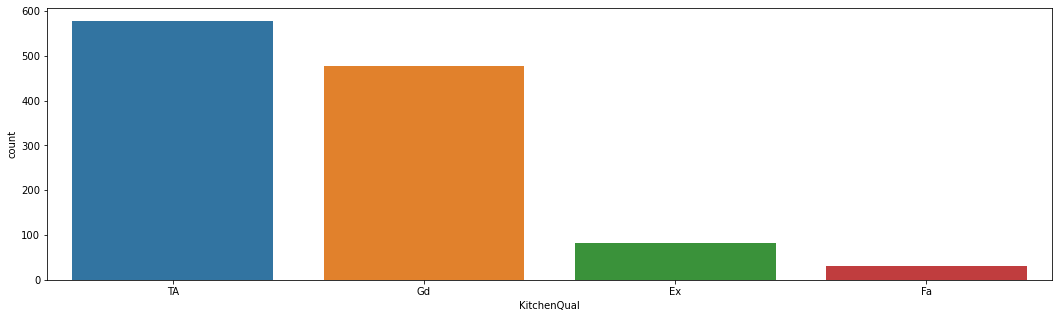

In [37]:
plt.figure(figsize=(18,5))
print(df_housing["KitchenQual"].value_counts())
sns.countplot(x="KitchenQual", data=df_housing)

Obs- We can see, maximum kitchens have quality, "TA:Typical/Average", followed by "Gd:Good", and few, "Ex:Excellent" , avery few,"Fa:Fair" and none "Po:Poor

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

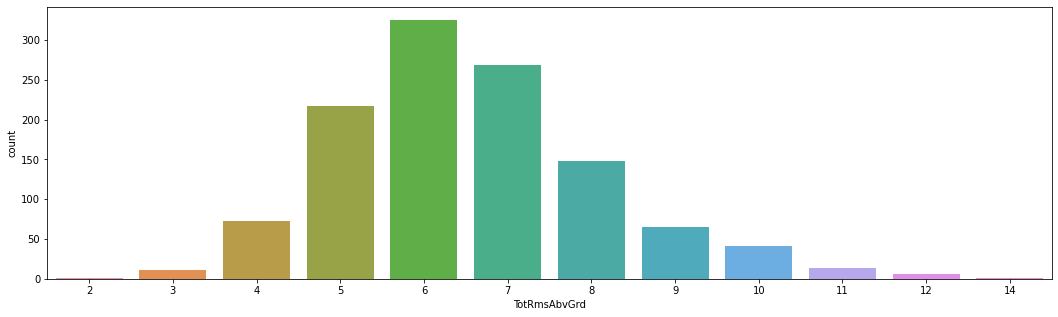

In [38]:
plt.figure(figsize=(18,5))
print(df_housing["TotRmsAbvGrd"].value_counts())
sns.countplot(x="TotRmsAbvGrd", data=df_housing)

Obs- We can see maximum properties have rooms in range of 5,6,7 , followed by 8, a few have 4, 9, 10 and and the other few who have 11,12,14 or 2 rooms

#### Finding numeric columns from the original dataset

In [39]:
# list of numerical variables
numerical_features = [i for i in df_housing.columns if df_housing[i].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_housing[numerical_features].head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000


In [40]:
# Distribution Plot to check skewness in columns

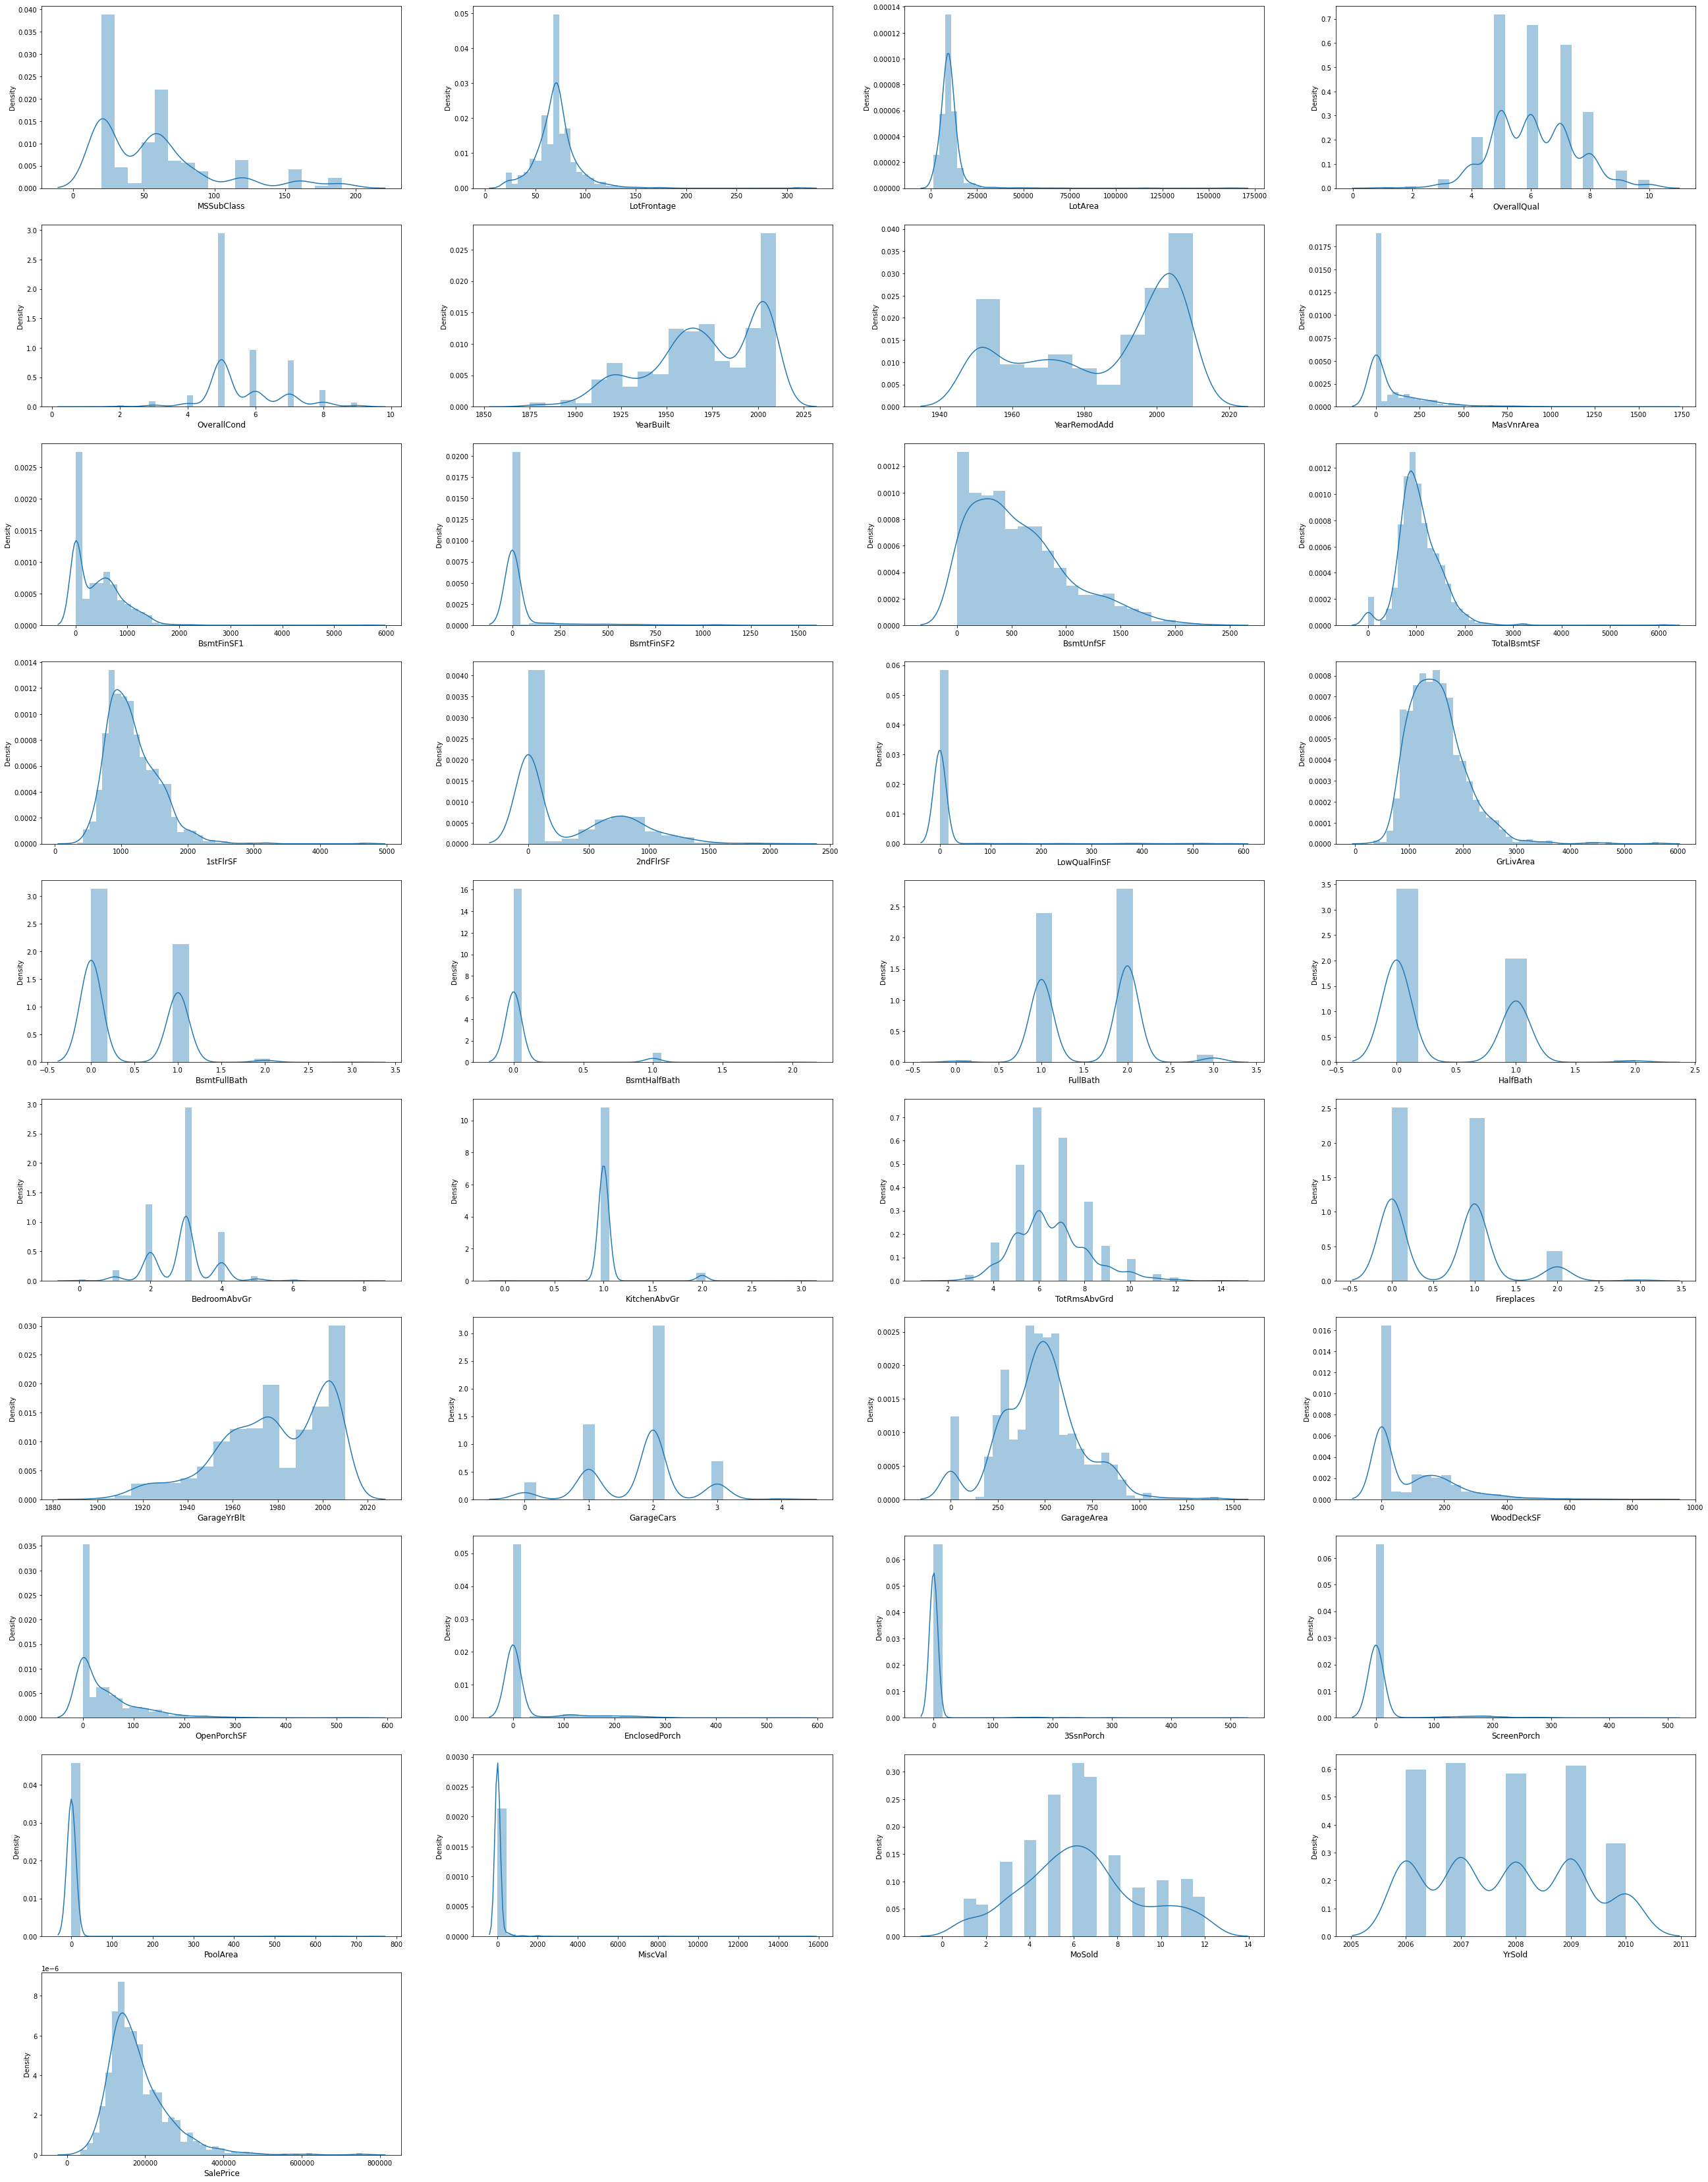

In [41]:
plt.figure(figsize=(45,60))
plotnumber=1

for column in df_housing[numerical_features]:
    if plotnumber<=38: #as there are 38 columns 
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df_housing[numerical_features][column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

Obs- We can see data in most columns is skewed, we will be treating it later

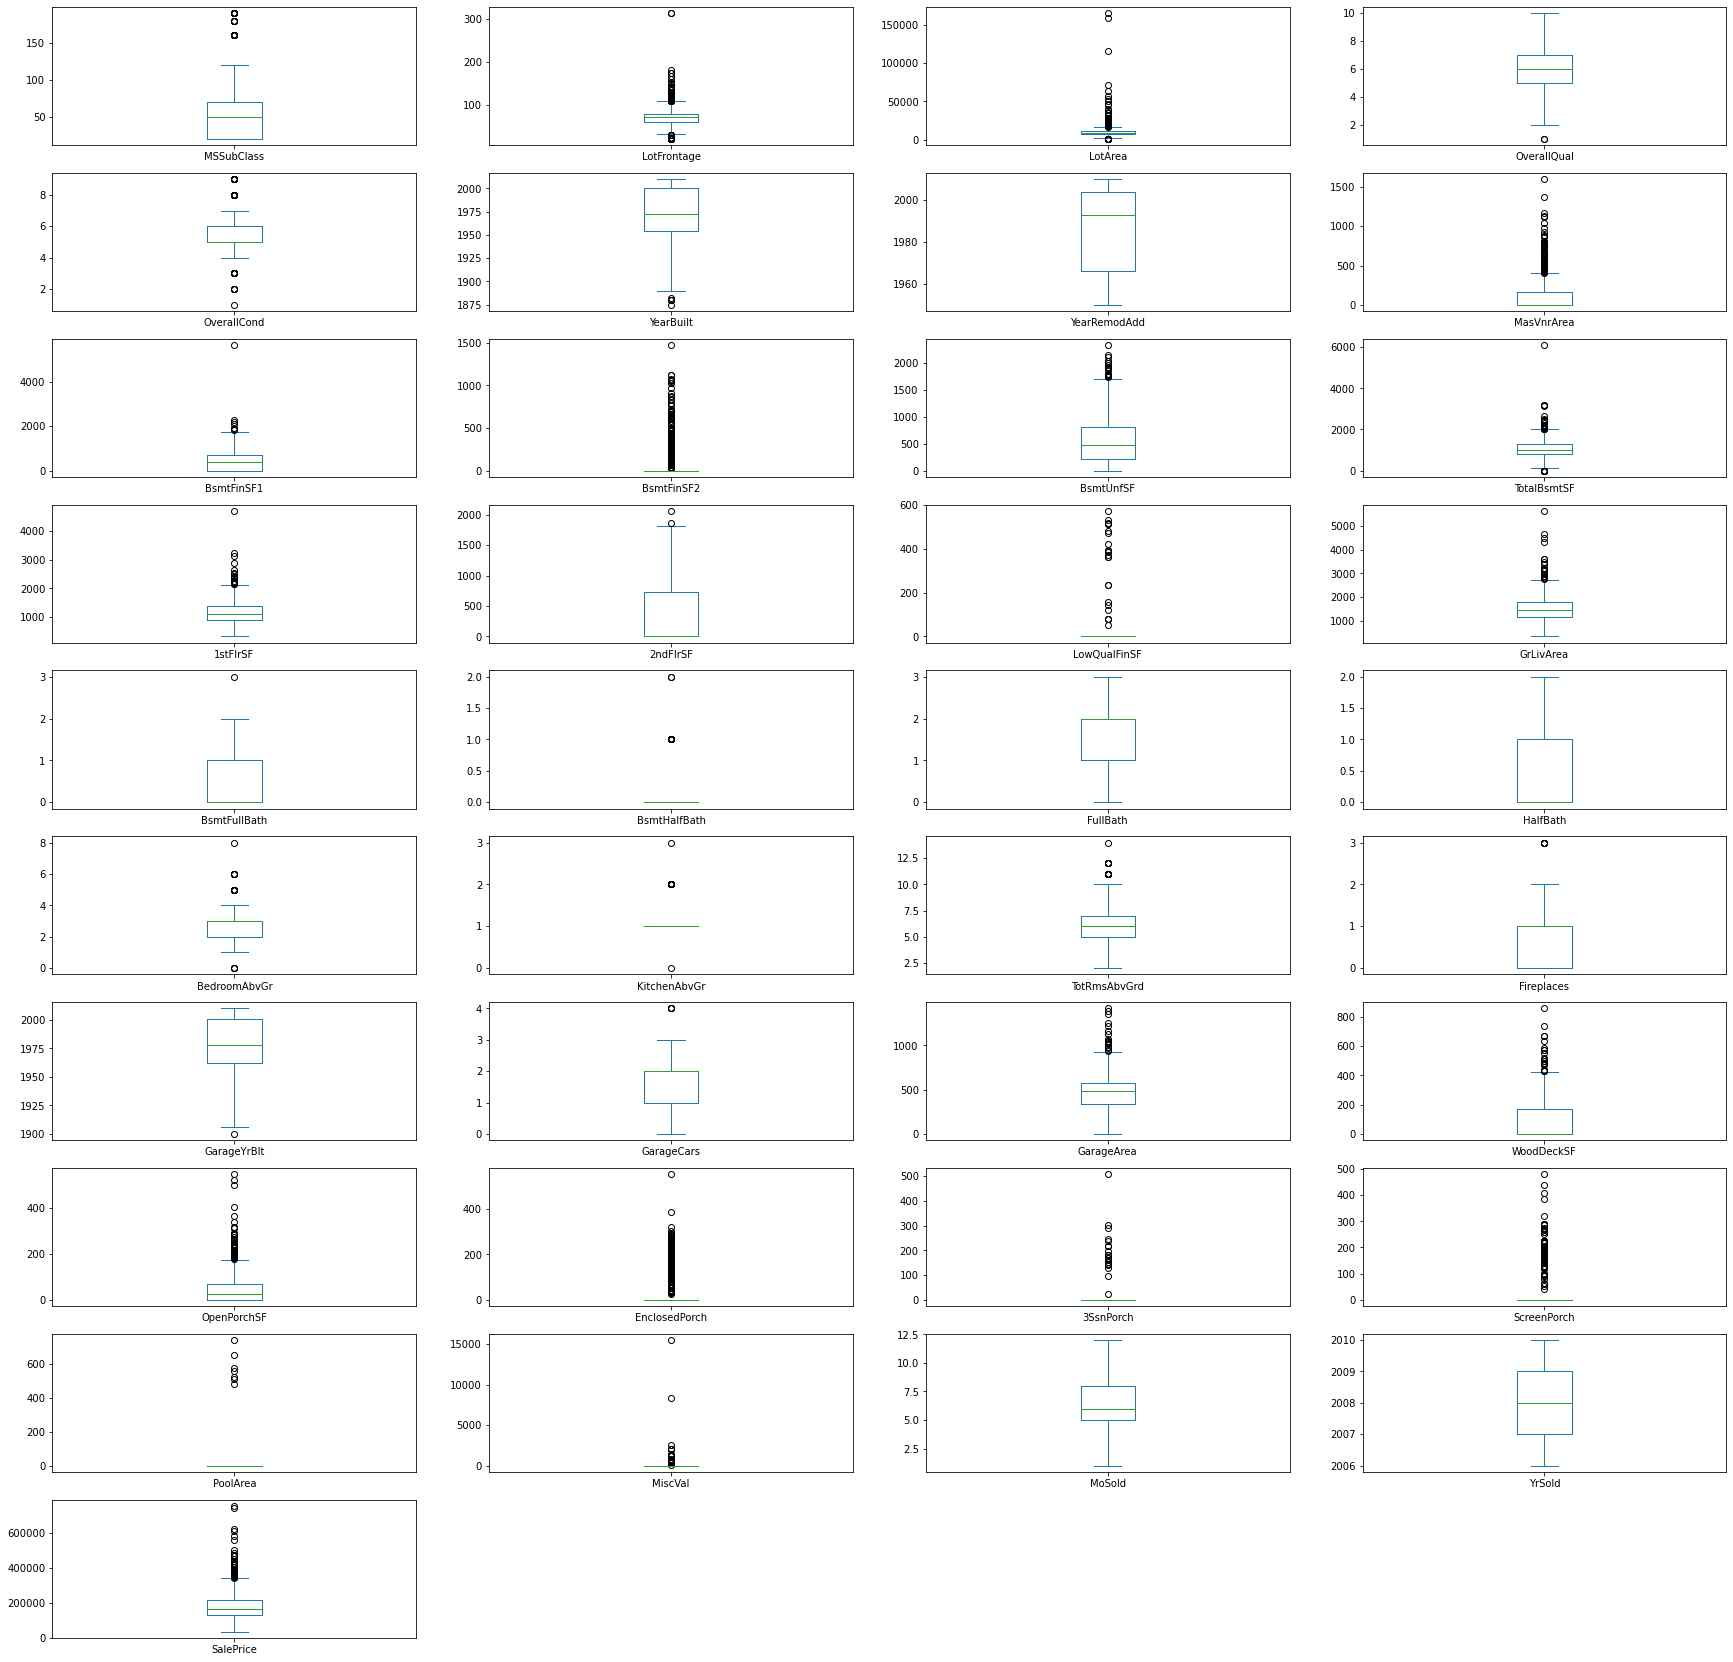

In [42]:
#Next, we will plot box plot of all columns in same figure(to check outliers)
df_housing.plot(kind='box',subplots=True,layout=(10,4),figsize=(30,30))
plt.show()

Obs- We can see outliers are present in most columns, we will be treating it later

### Bivariate Analysis

##### There are 37 Numeric Columns, but for Visulaization we will take only those who have individual unique value count <25

In [43]:
# list of variables with unique count<25 
num_feature2=[j for j in numerical_features 
                  if len(df_housing[j].unique())<25]
print("Count of variables with unique count<25  is:",len(num_feature2))

Count of variables with unique count<25  is: 18


In [44]:
df_housing[num_feature2].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2,2007
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10,2007
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6,2007
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1,2010
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6,2009


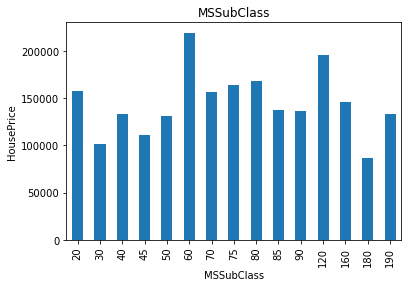

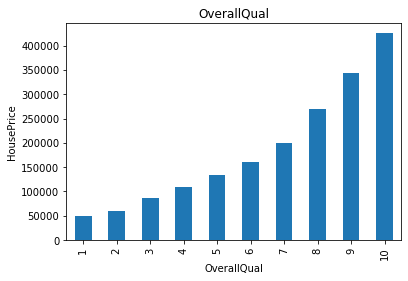

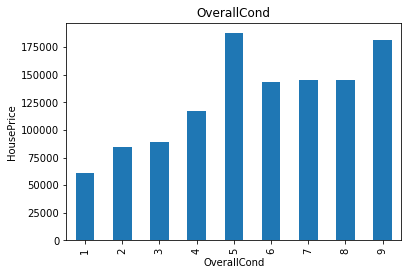

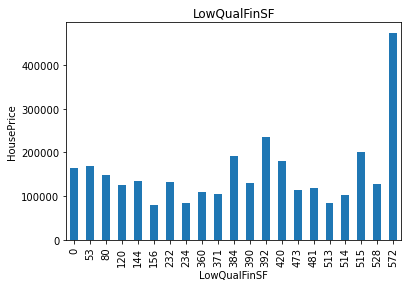

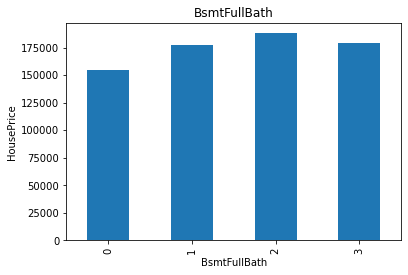

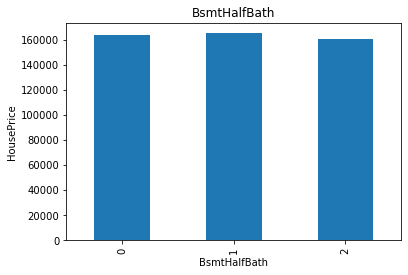

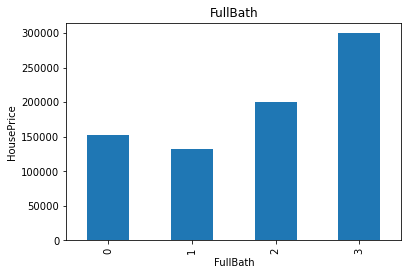

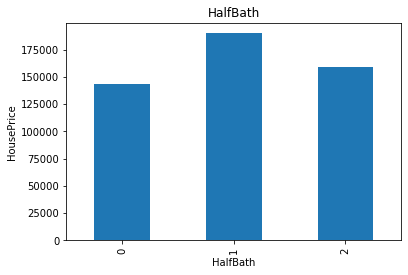

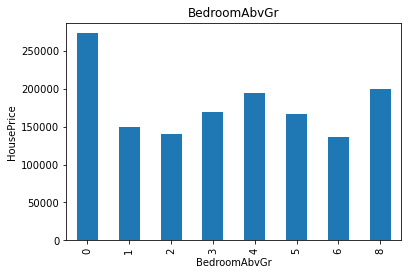

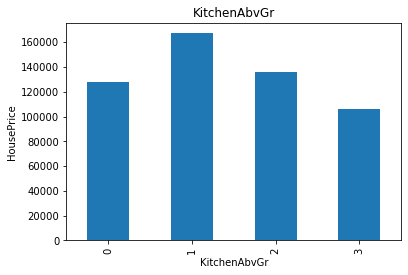

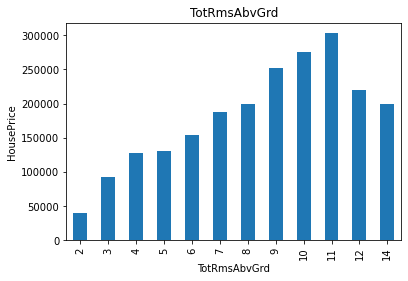

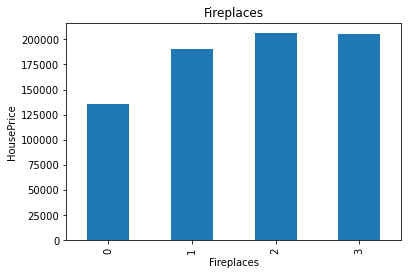

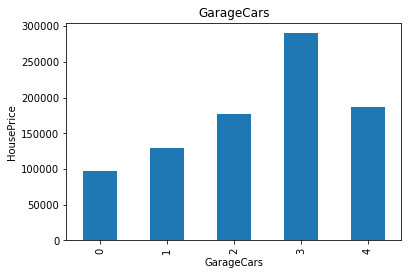

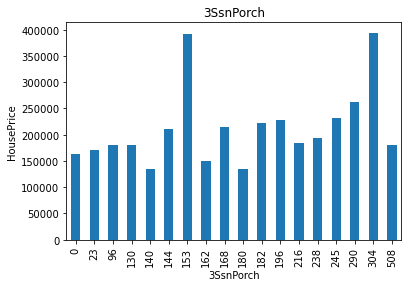

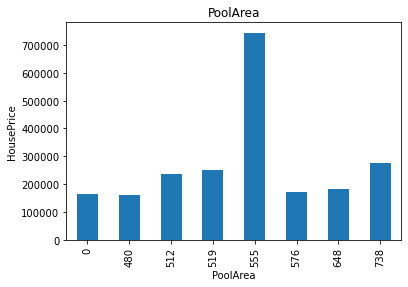

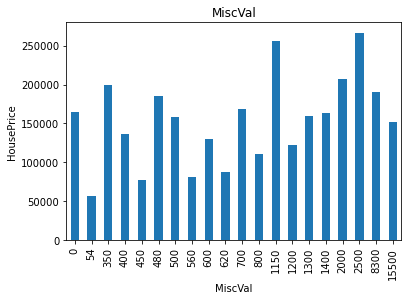

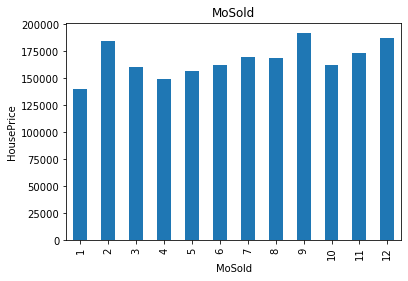

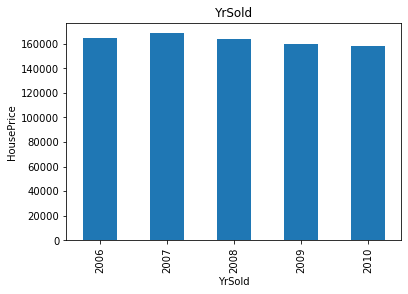

In [45]:
# All numeric variables with unique count<25  vs House Price

for feature in num_feature2:
    num_data=df_housing.copy()
    num_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

#### Finding categorical columns from the original dataset

In [46]:
categorical_features=[k for k in df_housing.columns if df_housing[k].dtypes=='O']
df_housing[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


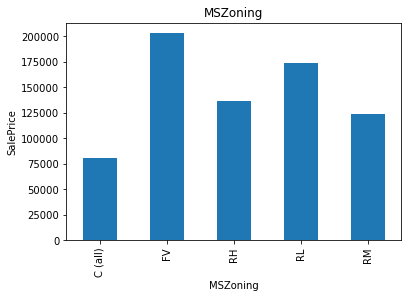

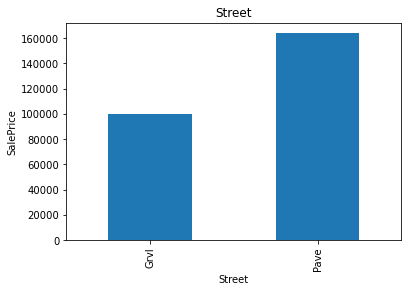

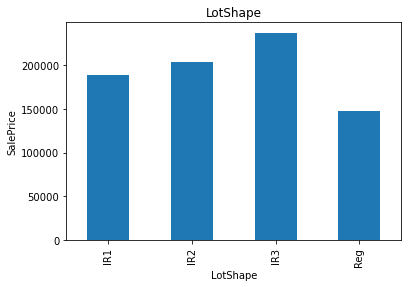

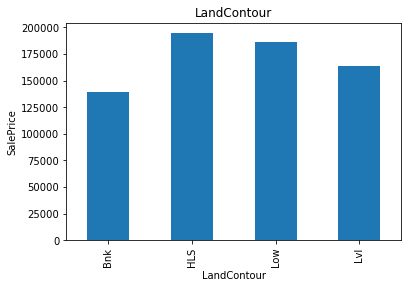

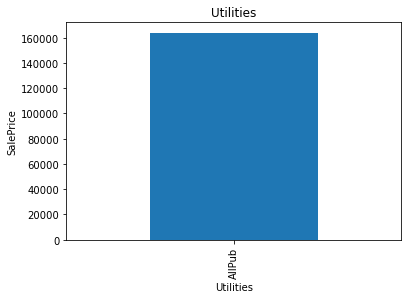

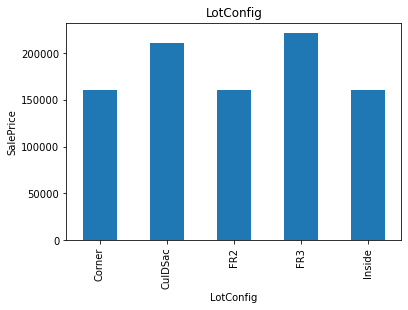

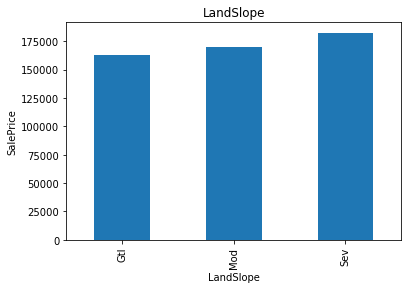

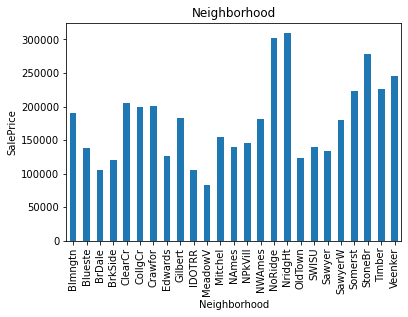

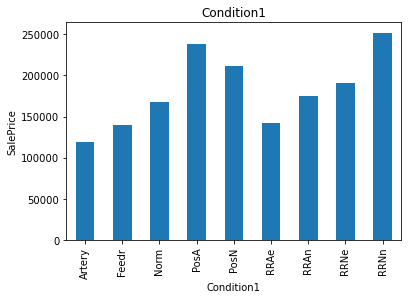

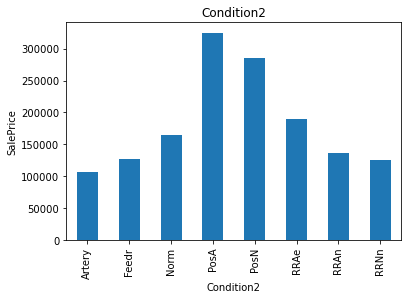

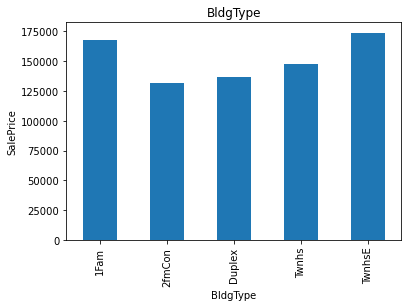

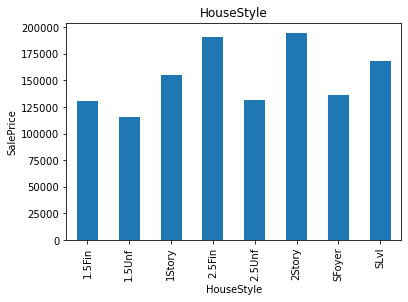

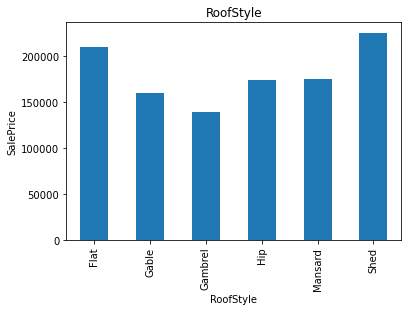

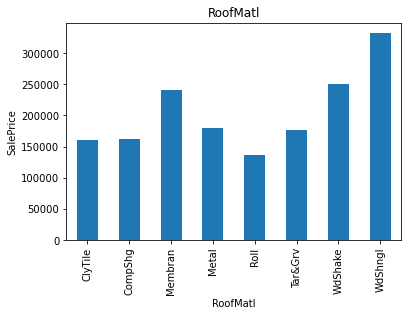

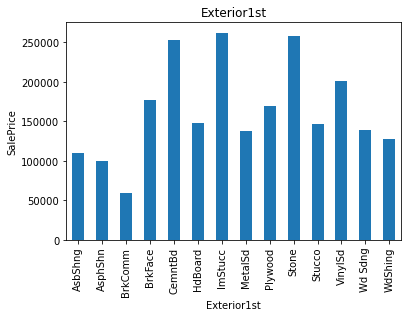

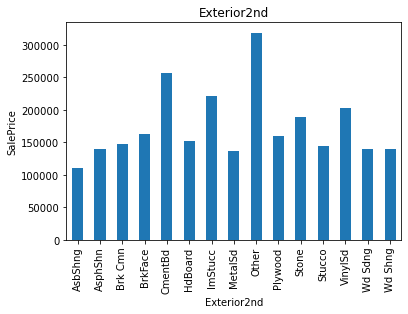

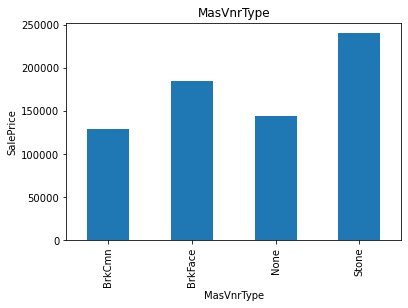

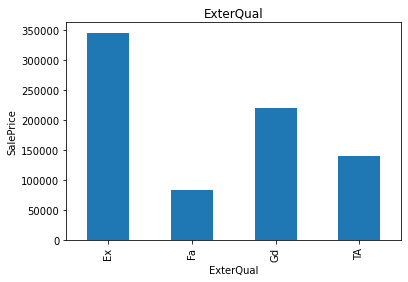

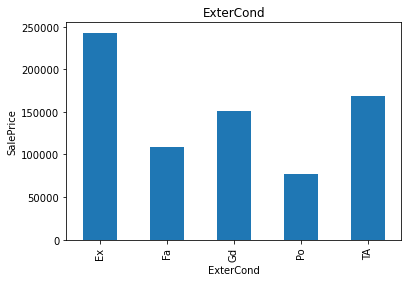

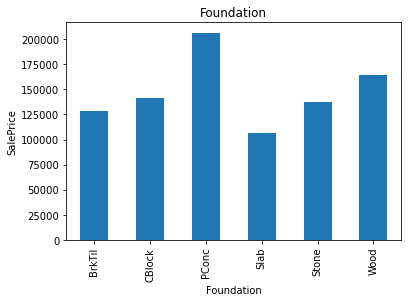

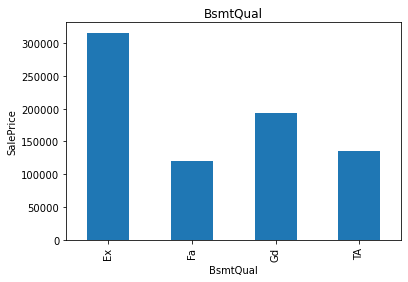

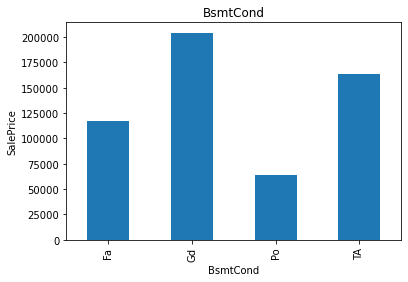

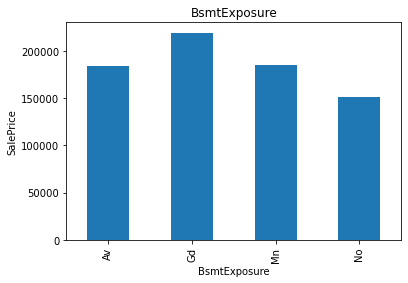

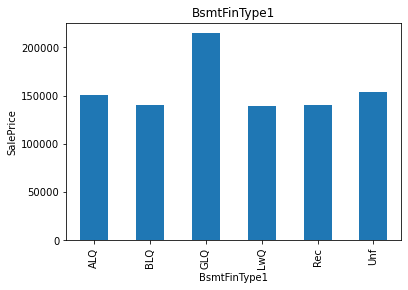

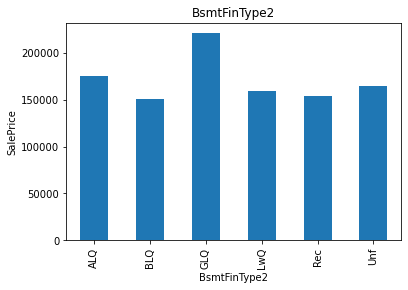

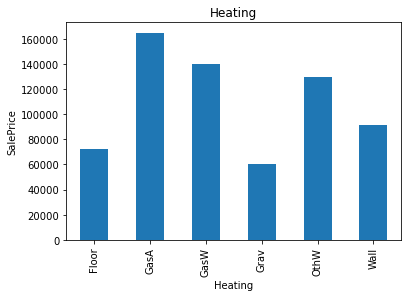

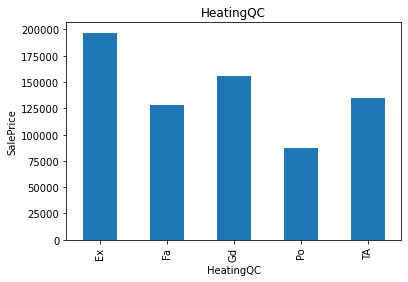

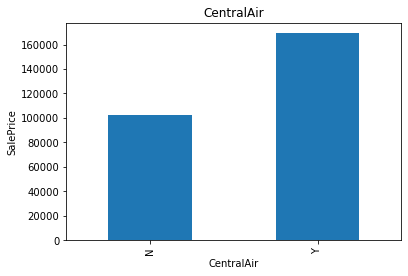

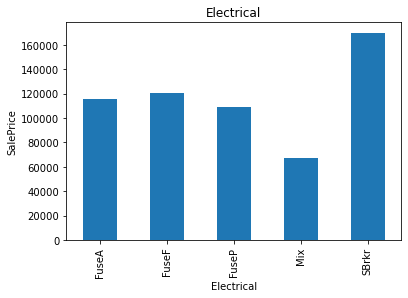

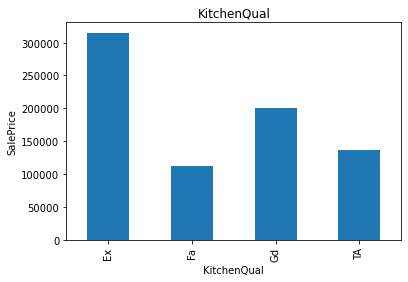

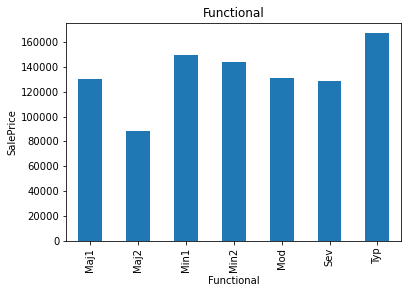

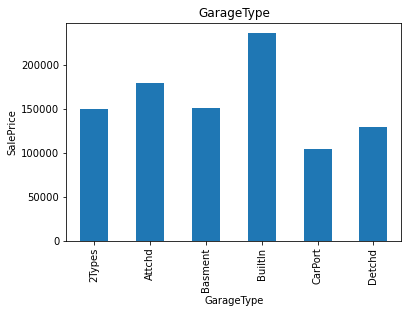

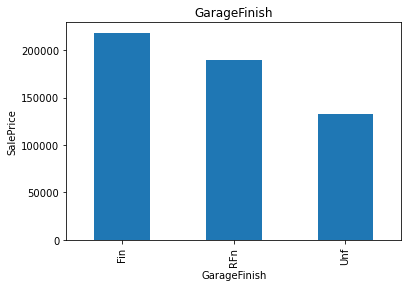

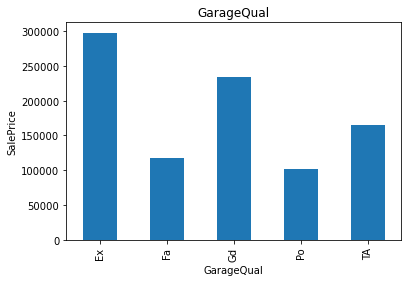

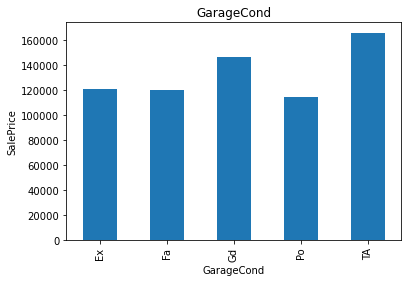

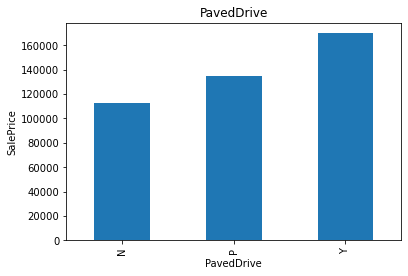

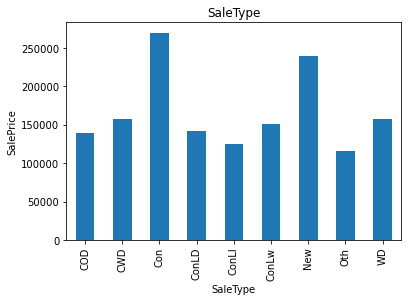

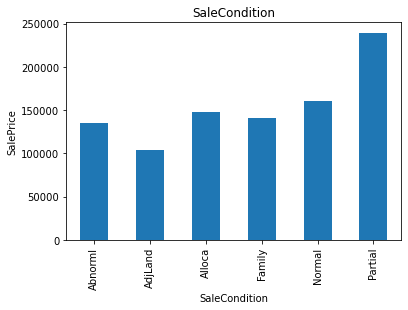

In [47]:
# Categorical variables vs SalesPrice
for features in categorical_features:
    cat_data=df_housing.copy()
    cat_data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

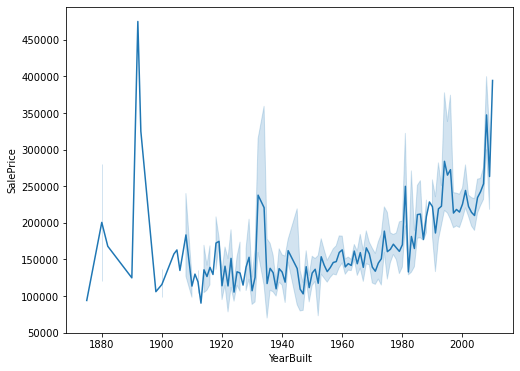

In [48]:
# Line plot to see the growth of Sale Price 
plt.figure(figsize=(8,6))
sns.lineplot(x='YearBuilt',y='SalePrice', data=df_housing)

Obs- We can see the prices goes high if the property is new

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

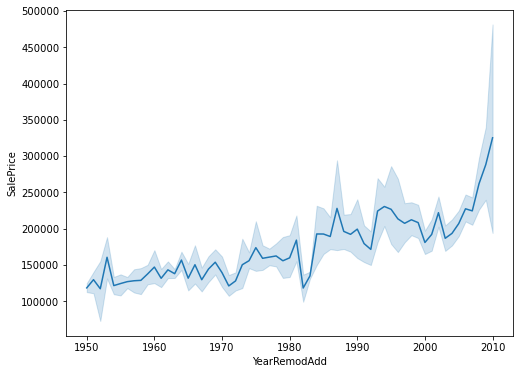

In [49]:
plt.figure(figsize=(8,6))
sns.lineplot(x='YearRemodAdd',y='SalePrice', data=df_housing)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

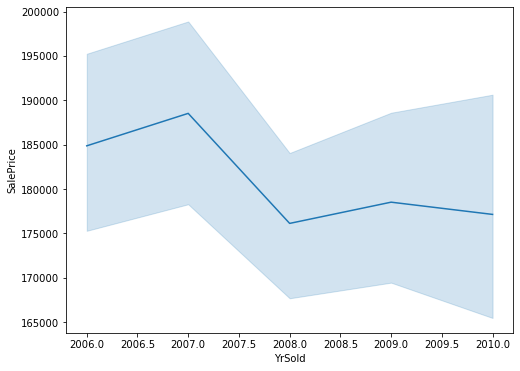

In [50]:
plt.figure(figsize=(8,6))
sns.lineplot(x='YrSold',y='SalePrice', data=df_housing)

Obs- We can see , the late a property is sold, the lower are the returns

## Encoding Categorical Data

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
    df_housing[i]=le.fit_transform(df_housing[i])

In [52]:
df_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,0,4,0,...,0,0,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,0,4,1,...,0,0,224,0,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,0,1,0,...,0,0,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,0,4,0,...,0,0,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,0,2,0,...,0,0,0,0,0,6,2009,8,4,215000


In [53]:
# Performing the encoding on Test Data
for i in categorical_features:
    df_htest[i]=le.fit_transform(df_htest[i])

## Checking Correlation

Since there are many columns, it would be hard to judge collinearity between each and every variable, so checking collinearity with targer variable only.

In [54]:
abs(df_housing.corr()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
BsmtQual         0.626850
ExterQual        0.624820
GarageArea       0.619000
TotalBsmtSF      0.595042
KitchenQual      0.592468
1stFlrSF         0.587642
FullBath         0.554988
GarageFinish     0.537121
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
HeatingQC        0.406604
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
GarageType       0.299470
HalfBath         0.295592
BsmtExposure     0.268559
LotArea          0.249499
LotShape         0.248171
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle   

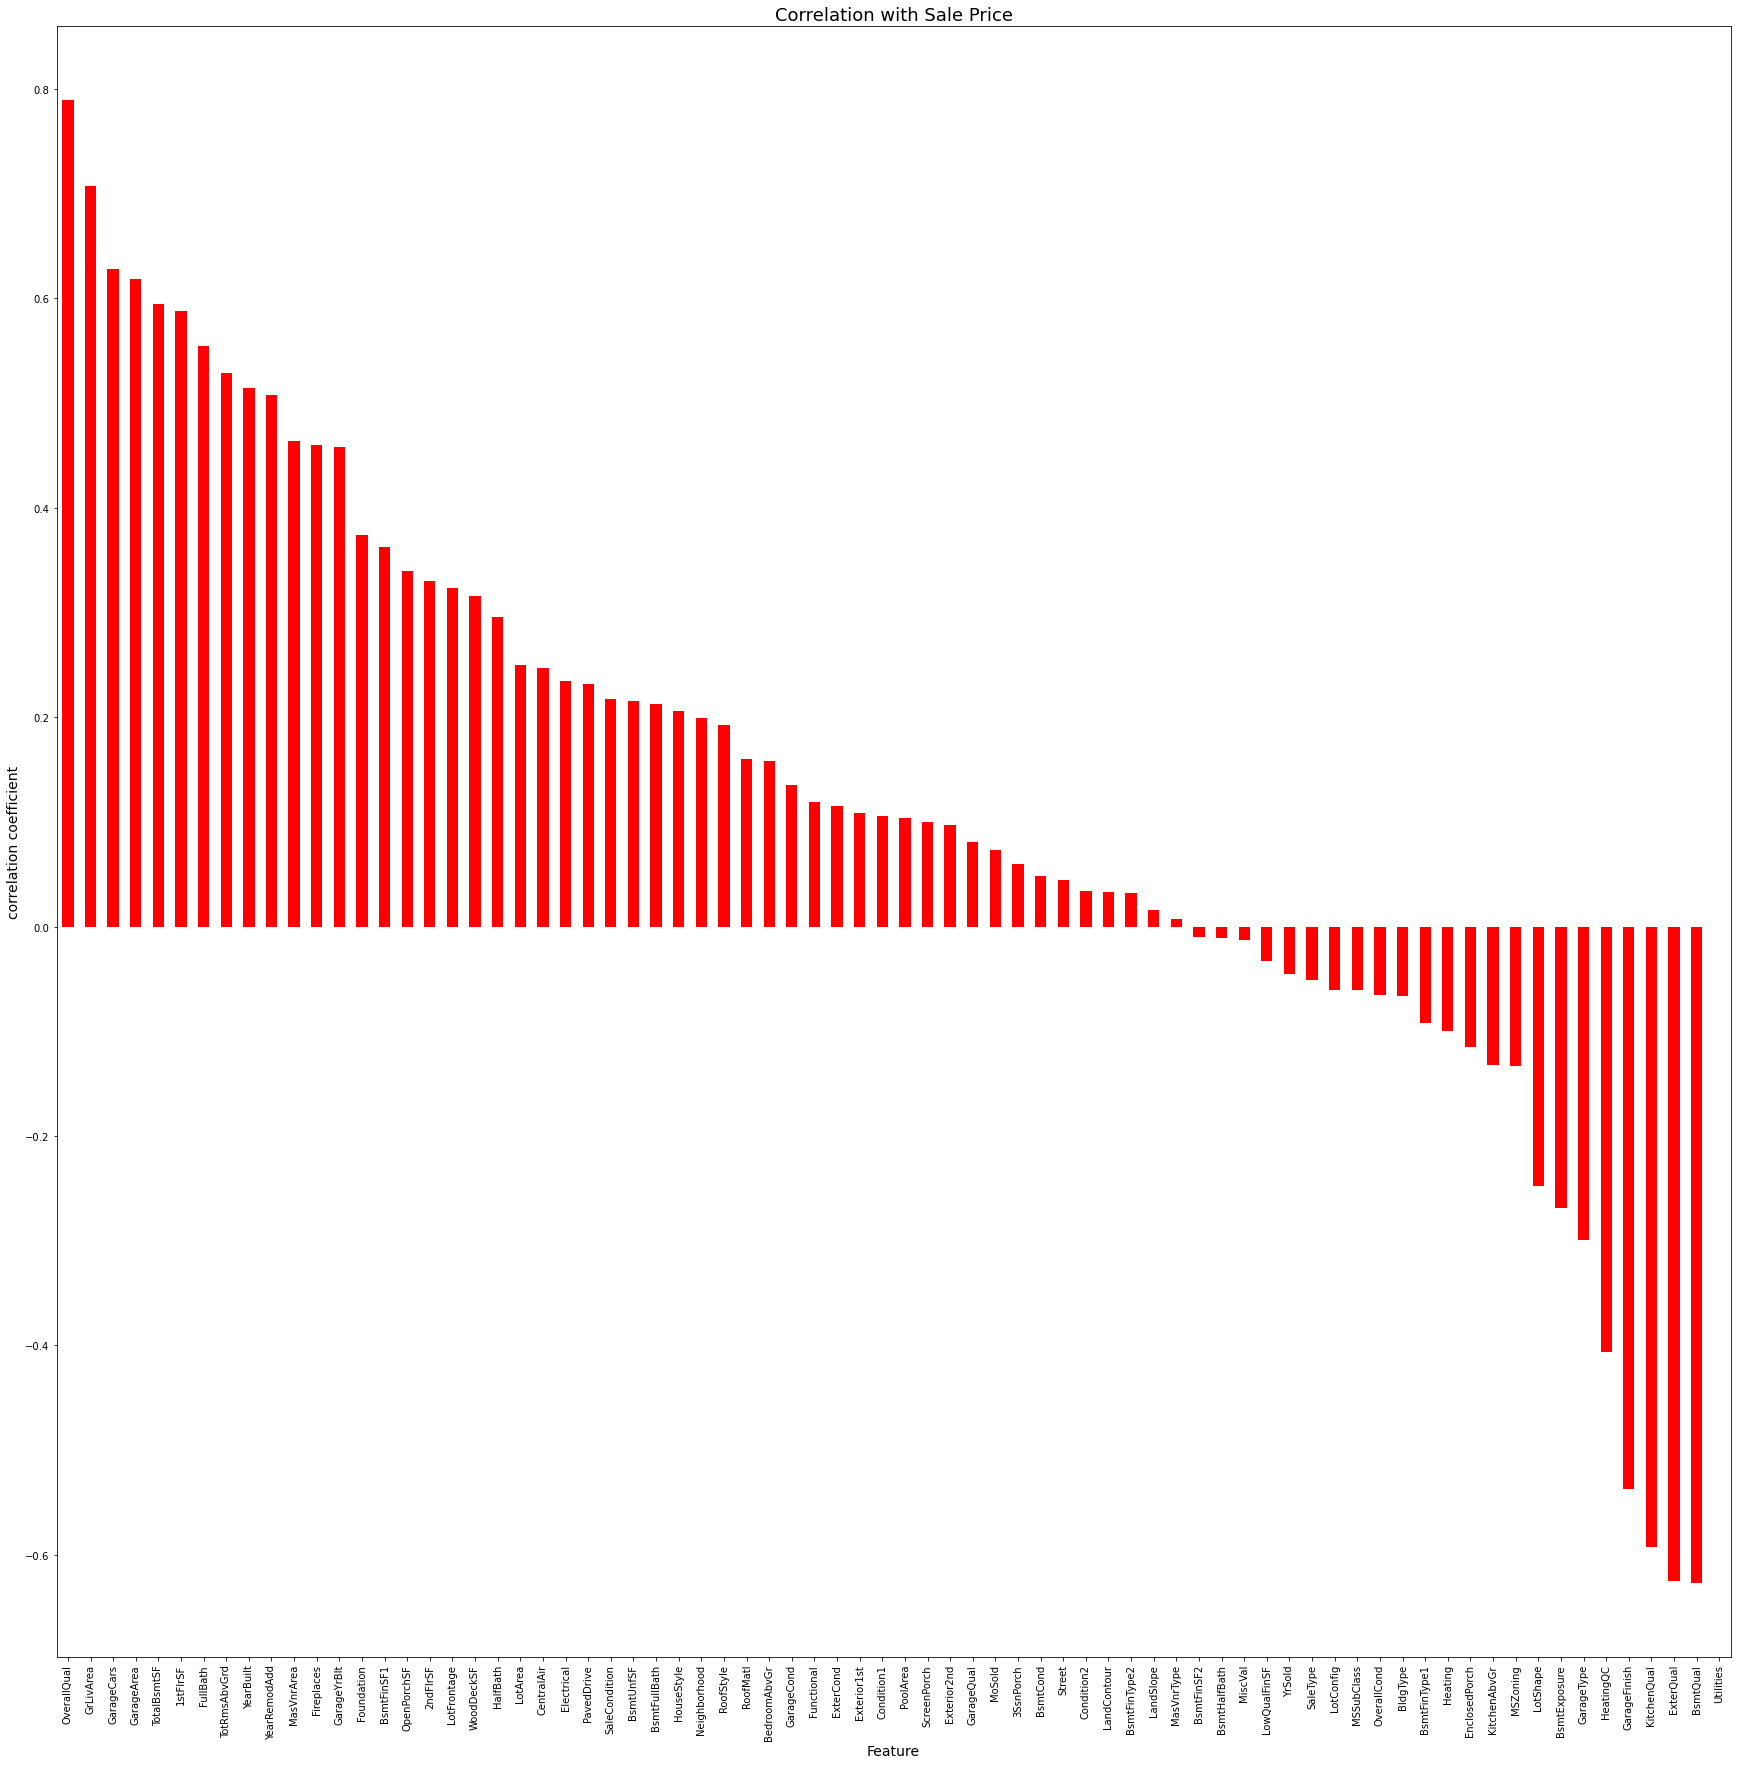

In [55]:
# Using bar plot
plt.figure(figsize=(30,30))
df_housing.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('correlation coefficient',fontsize=14)
plt.title('Correlation with Sale Price',fontsize=18)
plt.show()

We can drop few columns using Variance-Inflation Factor, but will be using PCA here, as number of columns are very large and even judging multi-collinearity is not feasible here.

## Checking for outliers

We will not be treating outliers as it was deleting all the rows data

## Data Transformation

### Checking for skewness

In [56]:
df_housing.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
Utilities         0.000000
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

Obs- We can see skewness is present in most of the columns, so will be seperating Input and output and then applying Transformation Method

In [57]:
# Seperating Input and Output 

In [58]:
x = df_housing.drop(columns = ['SalePrice'],axis=1)
y = df_housing['SalePrice']

### Applying Transformation Method/Treating Skewness

In [60]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_scaled=pt.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns) 

In [61]:
x.skew()

MSSubClass        0.064007
MSZoning          0.233113
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
LotShape         -0.594207
LandContour      -2.592303
Utilities         0.000000
LotConfig        -1.030401
LandSlope         3.954345
Neighborhood     -0.146541
Condition1        0.225468
Condition2        0.537277
BldgType          1.857194
HouseStyle       -0.080331
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
RoofStyle        -0.292233
RoofMatl         -6.314987
Exterior1st      -0.338023
Exterior2nd      -0.352793
MasVnrType       -0.016203
MasVnrArea        0.416370
ExterQual        -0.605112
ExterCond        -2.270791
Foundation        0.004296
BsmtQual         -0.413999
BsmtCond         -3.025865
BsmtExposure     -0.914214
BsmtFinType1     -0.206639
BsmtFinSF1       -0.404528
BsmtFinType2     -2.420885
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
H

In [62]:
# Doing the same for test data

htest_dis=pt.fit_transform(df_htest)
x1=pd.DataFrame(htest_dis,columns=df_htest.columns) 

## Data Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x=pd.DataFrame(data=x_scale)
x

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1.370435,-0.162456,0.093658,-1.213954,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,...,1.409990,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-1.719437,-0.604825,0.409069,0.029735
1,-1.167999,-0.162456,1.117135,1.100521,0.058621,-1.366794,0.341434,0.0,0.617281,4.188040,...,1.414498,-0.411301,-0.138554,3.360787,-0.077648,-0.193133,1.320612,-0.604825,0.409069,0.029735
2,0.490047,-0.162456,0.998803,0.158048,0.058621,-1.366794,0.341434,0.0,-1.482445,-0.238775,...,1.198911,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.076750,-0.604825,0.409069,0.029735
3,-1.167999,-0.162456,1.495566,0.496002,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,...,1.169545,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-2.209015,1.649742,-2.769993,0.029735
4,-1.167999,-0.162456,0.093658,1.196626,0.058621,-1.366794,0.341434,0.0,-1.025661,-0.238775,...,-1.061392,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.076750,0.899557,0.409069,0.029735
5,0.490047,-0.162456,-0.552490,0.855555,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,...,0.275826,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,1.647192,-1.359021,-2.256389,2.207969
6,-1.167999,-0.162456,0.093658,0.424957,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,...,-1.061392,-0.411301,-0.138554,3.360729,-0.077648,-0.193133,-0.456480,1.649742,0.409069,0.029735
7,-1.167999,-0.162456,0.837233,0.717859,0.058621,0.753907,0.341434,0.0,-1.725008,-0.238775,...,-1.061392,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-2.209015,-1.359021,0.409069,0.029735
8,-1.167999,-0.162456,0.047197,0.001967,0.058621,0.753907,0.341434,0.0,-1.725008,-0.238775,...,-1.061392,2.433545,-0.138554,-0.297551,-0.077648,5.177791,-0.853378,-0.604825,0.409069,0.029735
9,0.237618,-0.162456,0.499839,-0.152859,0.058621,0.753907,0.341434,0.0,0.617281,-0.238775,...,-1.061392,2.430968,-0.138554,-0.297551,-0.077648,-0.193133,1.320612,0.148052,-2.769993,-2.561702


In [64]:
# performing sacling on test data too

In [65]:
x1_scale=st.fit_transform(x1)
x1=pd.DataFrame(data=x1_scale)

## Using PCA to reduce curse of dimensionality

In [66]:
from sklearn.decomposition import PCA
pc=PCA(n_components=40)
x_pca=pc.fit_transform(x)
x_pca

array([[-7.18324400e-01, -4.42999515e-01, -2.08368759e+00, ...,
        -2.21184226e-01, -4.63551023e-01,  5.01999177e-01],
       [ 2.39747233e+00, -3.13772899e+00,  4.23300981e+00, ...,
         1.16504482e+00,  5.89286844e-02,  2.30828811e-03],
       [ 2.90575578e+00, -1.58244974e-01,  5.16048615e-01, ...,
         7.30960677e-01, -3.36790104e-01, -2.28516362e-01],
       ...,
       [-1.26684273e+00,  8.52432289e-01, -1.99326187e+00, ...,
        -5.71598662e-01,  1.26052532e-01,  1.35649105e-01],
       [-5.96822166e+00,  3.46246274e+00,  1.22425648e+00, ...,
        -1.15162876e+00, -2.13802605e+00,  1.93193470e+00],
       [ 2.82008515e+00,  9.35906391e-01, -1.26583750e+00, ...,
        -2.50902112e-01,  8.08901615e-02,  2.13760887e-02]])

In [67]:
x=pd.DataFrame(x_pca)

In [68]:
# Performing PCA on test data

In [69]:
pc=PCA(n_components=40)
x1_pca=pc.fit_transform(x1)
x1=pd.DataFrame(x1_pca)

## Data Modelling(Regression Model)

In [70]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8468354906983884  on Random_state  195


In [72]:
# Splitting the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=195)

In [73]:
x_train.shape

(817, 40)

In [74]:
y_train.shape

(817,)

In [75]:
x_test.shape

(351, 40)

In [76]:
y_test.shape

(351,)

### Using various Machine Learning Algorithms

#### 1. Linear Regression

In [77]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7996857643777088

In [78]:
predlr=lr.predict(x_test)
print("r2_score=",r2_score(y_test,predlr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predlr))
print("Mean Squared Error:",mean_squared_error(y_test,predlr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predlr)))

r2_score= 0.8468354906983884 

Mean Absolute Error: 22210.742586205022
Mean Squared Error: 860895664.2137587
Root Meand Squared Error: 29341.02357133709


#### 02. Support Vector Regressor

In [80]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

-0.05313108264573185

In [81]:
predsvr=svr.predict(x_test)
print("r2_score=",r2_score(y_test,predsvr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

r2_score= -0.03728484652218955 

Mean Absolute Error: 54805.50017117904
Mean Squared Error: 5830293394.973785
Root Meand Squared Error: 76356.35792109118


#### 3. Decision Tree Regressor

In [82]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [83]:
preddtr=dtr.predict(x_test)
print("r2_score=",r2_score(y_test,preddtr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2_score= 0.7408952690537688 

Mean Absolute Error: 27147.555555555555
Mean Squared Error: 1456356570.2393162
Root Meand Squared Error: 38162.24011034096


#### 4. K Neighbors Regressor

In [84]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.8089782517775758

In [85]:
predknr=knr.predict(x_test)
print("r2_score=",r2_score(y_test,predknr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predknr))
print("Mean Squared Error:",mean_squared_error(y_test,predknr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predknr)))

r2_score= 0.8162237147358579 

Mean Absolute Error: 22729.3150997151
Mean Squared Error: 1032956054.1839316
Root Meand Squared Error: 32139.633697102578


#### 5.Random Forest Regressor

In [86]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9749256940878515

In [87]:
predrfr=rfr.predict(x_test)
print("r2_score=",r2_score(y_test,predrfr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2_score= 0.875728249720397 

Mean Absolute Error: 18544.416381766383
Mean Squared Error: 698497396.6083114
Root Meand Squared Error: 26429.10132048215


#### 6.Ada Boost Regressor

In [88]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
adr.score(x_train,y_train)

0.8797392262573733

In [89]:
predadr=adr.predict(x_test)
print("r2_score=",r2_score(y_test,predadr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predadr))
print("Mean Squared Error:",mean_squared_error(y_test,predadr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predadr)))

r2_score= 0.8093723864709754 

Mean Absolute Error: 24383.68992021454
Mean Squared Error: 1071465489.7198594
Root Meand Squared Error: 32733.24746675556


#### 7.Gradient Boosting Regressor

In [90]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.9753082728429688

In [91]:
predgbr=gbr.predict(x_test)
print("r2_score=",r2_score(y_test,predgbr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predgbr)))

r2_score= 0.885742054875182 

Mean Absolute Error: 17286.20805242794
Mean Squared Error: 642212546.5516992
Root Meand Squared Error: 25341.912843187256


### Regularization to overcome Over-Fitting (Lasso,Ridge)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### 8. Lasso Regression

In [93]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7996857643240963

In [94]:
predls=ls.predict(x_test)
print("r2_score=",r2_score(y_test,predls),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predls))
print("Mean Squared Error:",mean_squared_error(y_test,predls))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predls)))

r2_score= 0.8468365046488601 

Mean Absolute Error: 22210.6304120361
Mean Squared Error: 860889965.0764793
Root Meand Squared Error: 29340.926452252308


#### 9. Ridge Regression

In [95]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.7996857630783943

In [96]:
predrg=rg.predict(x_test)
print("r2_score=",r2_score(y_test,predrg),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrg))
print("Mean Squared Error:",mean_squared_error(y_test,predrg))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrg)))

r2_score= 0.8468406085460842 

Mean Absolute Error: 22210.069589080736
Mean Squared Error: 860866898.196673
Root Meand Squared Error: 29340.53336592014


### Cross Validation 

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
# cv score for Linear Regressor
print('CV score  for Linear rgerssor',cross_val_score(lr,x,y,cv=10).mean()) 

CV score  for Linear rgerssor 0.778786125372394


In [105]:
# cv score for Support Vector Regressor 
print('CV score  for Support Vector Regressor',cross_val_score(svr,x,y,cv=10).mean())

CV score  for Support Vector Regressor -0.0607342112301519


In [106]:
# cv score for Decision Tree Regressor
print('CV score  for Decision Tree Regressor ',cross_val_score(dtr,x,y,cv=10).mean()) 

CV score  for Decision Tree Regressor  0.6753154297659809


In [107]:
# cv score for K Neighbors Regressor
print('CV score  for K Neighbors regressor ',cross_val_score(knr,x,y,cv=10).mean()) 

CV score  for K Neighbors regressor  0.7533147034124822


In [108]:
# cv score for Random Forest Regressor
print('CV score  for Random Forest Regressor ',cross_val_score(rfr,x,y,cv=10).mean())

CV score  for Random Forest Regressor  0.8347021035806346


In [109]:
# cv score for Ada Boost Regressor
print('CV score  for Ada Boost Regressor ',cross_val_score(adr,x,y,cv=10).mean())

CV score  for Ada Boost Regressor  0.7580034373997874


In [110]:
# cv score for GradientBoostingRegressor
print('CV score  for GradientBoostingRegressor',cross_val_score(gbr,x,y,cv=10).mean()) 

CV score  for GradientBoostingRegressor 0.8645902633177649


In [111]:
# cv score for Lasso Regressor
print('CV score  for Lasso Regressor ',cross_val_score(ls,x,y,cv=10).mean()) 

CV score  for Lasso Regressor  0.7787871295197937


In [112]:
# cv score for Ridge Regressor
print('CV score  for Ridge Regressor ',cross_val_score(rg,x,y,cv=10).mean()) 

CV score  for Ridge Regressor  0.7787908082503933


Obs-From the observation of accuracy and cross validation score and their difference we can predict that Gradient Boosting Regressor is the best model.

## Hyper Parameter Tuning

In [114]:
# Defining parameters for Gradient Boosting Algorithm
parameters = {'n_estimators':[100,150],'min_samples_split':[2,6],'min_samples_leaf':[1,5],'learning_rate': np.arange(0.1,0.5,0.1)}
#start the tuning
gbr=GradientBoostingRegressor()
GCV=GridSearchCV(gbr,parameters,cv=10)

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'learning_rate': 0.1, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [115]:
#Applying best parameter values on Gradient Bossting Regressor Algorithm 
gbr1=GradientBoostingRegressor(n_estimators=100 ,min_samples_split=2, min_samples_leaf=5 ,learning_rate= 0.1)
gbr1.fit(x_train,y_train)
gbr1.score(x_train,y_train)

0.9703886233500587

In [116]:
predgbr1=gbr1.predict(x_test)
print("r2_score=",r2_score(y_test,predgbr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr1))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predgbr1)))

r2_score= 0.8853868473648824 

Mean Absolute Error: 17373.136460818983
Mean Squared Error: 644209070.465153
Root Meand Squared Error: 25381.274011860653


Obs- Our best model after fine tuning has given r2_score=0.8853868473648824  and mean absolute error=17373.136460818983

## Feature Importance

From the overall EDA process(visualization, correlation), we can say the "atttributes/features" that effect sale price positively/negatively could be as follows:

* # Features affecting Positively to Sale Price
1. MSSubClass(As according to the type of building(story) they have its price increase)
2. LotFrontage: Linear feet of street connected to property (The more street, the more price)
3. LotArea: Lot size in square feet(The larger the area, higher the price)
4. TotalBsmtSF: Total square feet of basement area(The larger the basement area, higher the price)
5. TotRmsAbvGrd: Total rooms above grade(More the number of rooms, higher the price, and they do owe properties with max 6-7-8 rooms)
6. YearBuilt: Original construction date (As they do owe lots of new properties  or old properties that are remodelled,they can get good sale price)
7. KitchenQual: Kitchen quality(Most of the properties have good kitchen quality)
8. FullBath: Full bathrooms above grade
9. GarageCars: Size of garage in car capacity(They do own max properties that have atleast 2-3 cars area for garage and min 1)

* # Features affecting Negatively to Sale Price
1. OverallQual:(Since the maximum properties they owe have average quality of material used,it is negatively affecting the sale price)
2. OverallCond:(Again,the maximum properties they owe have average condition it is negatively affecting the sale price)
3. LotShape:(Since they have half of the properties whose shape is irregular, it is negatively affecting the sale price)

## Saving the best model

In [120]:
import pickle
filename='housing_price_report'
pickle.dump(gbr1,open(filename,'wb'))

In [121]:
housing_best = pickle.load(open(filename, 'rb'))
housing_best

GradientBoostingRegressor(min_samples_leaf=5)

## Using Best Model to Predict Provided Test Data

In [125]:
predict= housing_best.predict(x1)
pred_price= pd.DataFrame(predict)
pred_price

,0
0,448688.126419
1,213947.236265
2,252954.108141
3,150121.358193
4,284652.265922
5,60070.575918
6,136634.549913
7,377278.062983
8,194156.003204
9,171368.006642


In [126]:
# Appending this result of predicted price in original test data provided and saving it in csv format

In [128]:
df_htest['Predicted Sale Price']=pred_price

In [129]:
df_htest.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted Sale Price
0,20,2,86.000000,14157,1,0,1,0,0,0,...,0,0,0,0,0,7,2007,5,2,448688.126419
1,120,2,66.425101,5814,1,0,3,0,1,0,...,0,0,0,0,0,8,2009,0,0,213947.236265
2,20,2,66.425101,11838,1,3,3,0,4,0,...,0,0,0,0,0,6,2009,5,2,252954.108141
3,70,2,75.000000,12000,1,3,0,0,4,0,...,0,0,0,0,0,7,2009,5,2,150121.358193
4,60,2,86.000000,14598,1,0,3,0,1,0,...,0,0,0,0,0,1,2008,5,2,284652.265922


Obs- We can see a new column['Predicted Sale Price']has been appended in the test-data provided

### Saving the Predicted Test Model in csv format

In [132]:
df_htest.to_csv('housing price test data predicted')

In [133]:
house_pred=pd.read_csv('housing price test data predicted')

In [134]:
house_pred

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted Sale Price
0,0,20,2,86.000000,14157,1,0,1,0,0,...,0,0,0,0,0,7,2007,5,2,448688.126419
1,1,120,2,66.425101,5814,1,0,3,0,1,...,0,0,0,0,0,8,2009,0,0,213947.236265
2,2,20,2,66.425101,11838,1,3,3,0,4,...,0,0,0,0,0,6,2009,5,2,252954.108141
3,3,70,2,75.000000,12000,1,3,0,0,4,...,0,0,0,0,0,7,2009,5,2,150121.358193
4,4,60,2,86.000000,14598,1,0,3,0,1,...,0,0,0,0,0,1,2008,5,2,284652.265922
5,5,180,3,21.000000,1936,1,3,3,0,4,...,0,0,0,0,0,12,2007,5,2,60070.575918
6,6,180,3,35.000000,3675,1,3,3,0,4,...,0,0,0,0,0,5,2006,5,2,136634.549913
7,7,20,2,107.000000,13891,1,3,3,0,4,...,0,0,0,0,0,1,2008,4,3,377278.062983
8,8,80,2,66.425101,12800,1,3,2,0,4,...,0,0,396,0,0,8,2009,5,2,194156.003204
9,9,120,3,32.000000,4500,1,3,3,0,2,...,0,0,0,0,0,6,2009,5,2,171368.006642


## Conclusion- 
#### Our best model is Gradient Boosting Regressor, and the predicted values provided by it are stored in a data frame as well as csv file, which is also attached in the submission folder